<a href="https://colab.research.google.com/github/Aman-Gautam1/Assignment_ZeoTap/blob/main/Aman_Gautam_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cust_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/Assignment Zeotap/Customers.csv')
trans_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/Assignment Zeotap/Transactions.csv')


# Feature engineering
calculating how recent the customer have bought  product

In [42]:
trans_df['TransactionDate'] = pd.to_datetime(trans_df['TransactionDate'])

recency = trans_df.groupby('CustomerID')['TransactionDate'].max()
#cur date
current_date = pd.to_datetime('2025-01-27')

# Calculate recency as the number of days since the last transaction
recency = (current_date - recency).dt.days
recency.name = 'Recency'
recency.sort_values(ascending=True)

,Recency
CustomerID,
C0101,29
C0197,30
C0181,30
C0119,31
C0029,31
...,...
C0080,320
C0058,360
C0020,362


frequency

In [41]:
# Calculate frequency as the number of transactions per customer
frequency = trans_df.groupby('CustomerID')['TransactionID'].count()
frequency.name = 'Frequency'
frequency.sort_values(ascending=False)

,Frequency
CustomerID,
C0156,11
C0109,11
C0175,10
C0141,10
C0065,10
...,...
C0110,1
C0078,1
C0020,1


Amount spend

In [40]:
# Calculate monetary value as the sum of transaction amounts (assuming 1 per transaction)
monetary = trans_df.groupby('CustomerID')['TransactionID'].count()  # Replace with actual amount if available
monetary.name = 'Monetary'
monetary.sort_values(ascending=False)

,Monetary
CustomerID,
C0156,11
C0109,11
C0175,10
C0141,10
C0065,10
...,...
C0110,1
C0078,1
C0020,1


diversity

In [43]:
# Calculate product diversity as the number of unique products purchased by each customer
diversity = trans_df.groupby('CustomerID')['ProductID'].nunique()
diversity.name = 'Diversity'
diversity.sort_values(ascending=False)

,Diversity
CustomerID,
C0156,10
C0109,10
C0008,10
C0065,10
C0175,10
...,...
C0150,1
C0151,1
C0033,1


Region and signup

In [16]:

# Merge profile data (Region, SignupDate) with the transaction features
customer_features = pd.merge(recency, frequency, on='CustomerID')
customer_features = pd.merge(customer_features, monetary, on='CustomerID')
customer_features = pd.merge(customer_features, diversity, on='CustomerID')
customer_features = pd.merge(customer_features, cust_df[['CustomerID', 'Region']], on='CustomerID')

# Calculate how long each customer has been with the platform (Signup Duration)
customer_features['SignupDate'] = pd.to_datetime(cust_df['SignupDate'])
customer_features['SignupDuration'] = (current_date - customer_features['SignupDate']).dt.days


Encoding

In [17]:
# One-Hot Encoding for the 'Region' feature
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

customer_features

,CustomerID,Recency,Frequency,Monetary,Diversity,SignupDate,SignupDuration,Region_Europe,Region_North America,Region_South America
0,C0001,85,5,5,5,2022-07-10,932,False,False,True
1,C0002,54,4,4,4,2022-02-13,1079,False,False,False
2,C0003,155,4,4,4,2024-03-07,326,False,False,True
3,C0004,34,8,8,8,2022-10-09,841,False,False,True
4,C0005,83,3,3,3,2022-08-15,896,False,False,False
...,...,...,...,...,...,...,...,...,...,...
194,C0196,42,4,4,3,2024-09-17,132,True,False,False
195,C0197,30,3,3,3,2022-06-07,965,True,False,False
196,C0198,114,2,2,2,2023-03-21,678,True,False,False
197,C0199,92,4,4,4,2022-02-27,1065,True,False,False


# Standardization

In [20]:
continuous_features = ['Recency', 'Frequency', 'Monetary', 'Diversity', 'SignupDuration']

# Initialize the scaler
scaler = StandardScaler()

# Normalize the features
customer_features = scaler.fit_transform(customer_features[continuous_features])
customer_features


array([[-0.26118012, -0.01145819, -0.01145819,  0.05004655,  1.15063072],
       [-0.6993689 , -0.46749414, -0.46749414, -0.42420409,  1.6022226 ],
       [ 0.72827842, -0.46749414, -0.46749414, -0.42420409, -0.71103375],
       [-0.98207134,  1.35664965,  1.35664965,  1.47279848,  0.87107384],
       [-0.28945036, -0.92353008, -0.92353008, -0.89845473,  1.04003679],
       [ 0.10633305, -0.46749414, -0.46749414, -0.42420409, -0.52671053],
       [ 0.7141433 , -0.92353008, -0.92353008, -0.89845473,  1.2182159 ],
       [-0.89726061,  2.26872154,  2.26872154,  2.42129976, -0.54514285],
       [ 0.03565744, -0.92353008, -0.92353008, -0.89845473, -0.07819071],
       [-0.45907183, -0.46749414, -0.46749414, -0.42420409,  0.66524625],
       [-1.02447671, -0.01145819, -0.01145819,  0.05004655,  0.67446242],
       [-1.01034159,  0.9006137 ,  0.9006137 ,  0.52429719, -1.18105794],
       [-0.27531524,  0.9006137 ,  0.9006137 ,  0.99854783, -0.93529366],
       [ 3.83800527, -1.83560198, -1.8

# Elbow  method

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

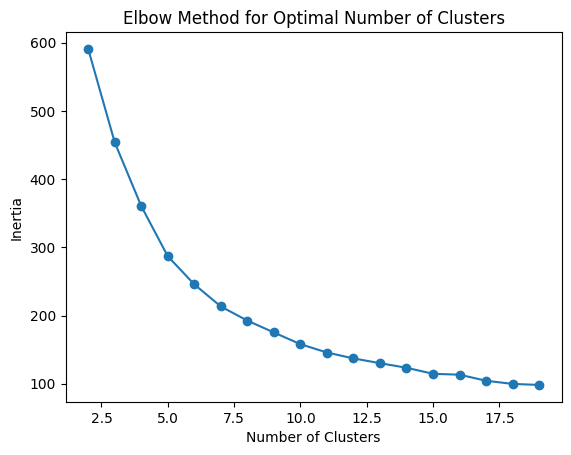

In [21]:
inertia_values = []

# Try a range of clusters (2 to 20)
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(customer_features)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(2, 20), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# K- means ++

In [51]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Set the number of clusters
k = 8

# Fit K-Means
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(customer_features)


# SCORE

In [52]:
# Calculate the Silhouette Score
silhouette_avg_kmeans = silhouette_score(customer_features, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_avg_kmeans}")

# Calculate the Davies-Bouldin Index (DBI)
db_index_kmeans = davies_bouldin_score(customer_features, kmeans_labels)
print(f"K-Means Davies-Bouldin Index: {db_index_kmeans}")

K-Means Silhouette Score: 0.30844284822405676
K-Means Davies-Bouldin Index: 0.9649541908964934


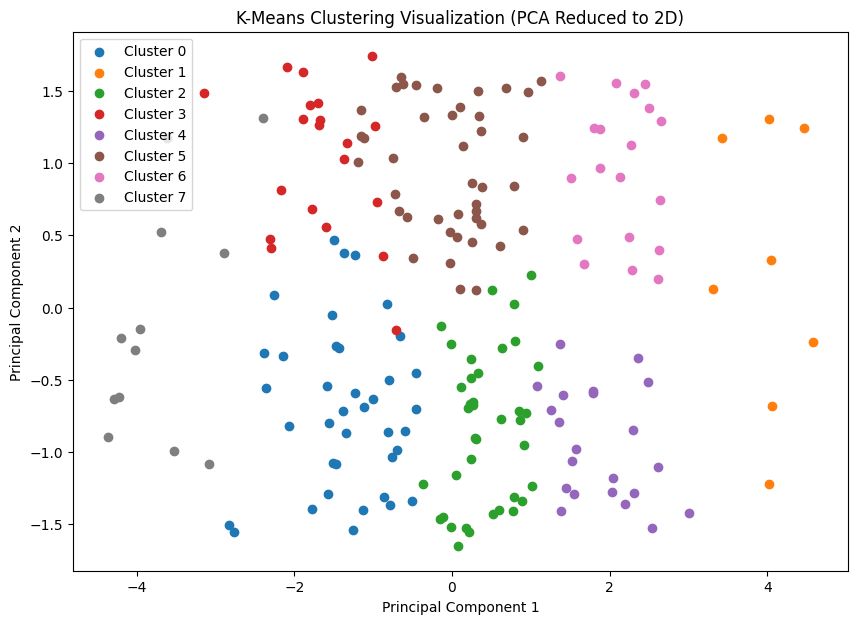

In [53]:
pca = PCA(n_components=2)
customer_features_2d = pca.fit_transform(customer_features)

# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in np.unique(kmeans_labels):
    plt.scatter(
        customer_features_2d[kmeans_labels == cluster, 0],
        customer_features_2d[kmeans_labels == cluster, 1],
        label=f'Cluster {cluster}'
    )

# Add titles and labels
plt.title('K-Means Clustering Visualization (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()